# Google Stock Price Forecasting

## 1-Libraries

In [16]:
import datetime
from datetime import datetime
from datetime import timezone
import datetime as dt
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import tensorflow as tf
from sklearn.metrics import mean_absolute_error

In [4]:
df=pd.read_csv("/Users/kayttaja/.spyder-py3/Google_Stock_Price.csv")
df.head()

,Date,Open,High,Low,Close,Volume
0,26-Sep-17,936.69,944.08,935.12,937.43,1672749
1,25-Sep-17,939.45,939.75,924.51,934.28,1873375
2,22-Sep-17,942.77,950.00,940.84,943.26,1074806
3,21-Sep-17,948.13,952.80,939.38,947.55,1370685
4,20-Sep-17,937.73,950.00,937.50,947.54,2004018


In [7]:
df["Date"]=pd.to_datetime(df["Date"])
df["Time"]=df.apply(lambda row: len(df)- row.name, axis=1)
df["CloseFuture"]=df["Close"].shift(30)
df.head()

,Date,Open,High,Low,Close,Volume,Time,CloseFuture
0,2017-09-26,936.69,944.08,935.12,937.43,1672749,1258,NaN
1,2017-09-25,939.45,939.75,924.51,934.28,1873375,1257,NaN
2,2017-09-22,942.77,950.00,940.84,943.26,1074806,1256,NaN
3,2017-09-21,948.13,952.80,939.38,947.55,1370685,1255,NaN
4,2017-09-20,937.73,950.00,937.50,947.54,2004018,1254,NaN


In [10]:
df_test=df[:185]
df_train=df[185:]

X=np.array(df_train["Time"])
X=X.reshape(-1,1)

scaler=preprocessing.MinMaxScaler()
X_scaled=scaler.fit_transform(X)

y=np.array(df_train["CloseFuture"])

In [11]:
df_train["CloseFuture"]

185     840.03
186     838.96
187     834.85
188     830.06
189     829.88
         ...  
1253    323.95
1254    326.60
1255    329.86
1256    333.28
1257    331.85
Name: CloseFuture, Length: 1073, dtype: float64

In [12]:
y

array([840.03, 838.96, 834.85, ..., 329.86, 333.28, 331.85])

Train on 1073 samples
Epoch 1/30
1073/1073 [==============================] - 1s 1ms/sample - loss: 326523.7475 - mae: 552.8312
Epoch 2/30
1073/1073 [==============================] - 0s 274us/sample - loss: 102068.9406 - mae: 275.4035
Epoch 3/30
1073/1073 [==============================] - 0s 297us/sample - loss: 20121.6426 - mae: 116.2839s - loss: 20128.3710 - mae: 116.262
Epoch 4/30
1073/1073 [==============================] - 0s 309us/sample - loss: 18874.6301 - mae: 115.3458
Epoch 5/30
1073/1073 [==============================] - 0s 315us/sample - loss: 18835.2927 - mae: 115.4659
Epoch 6/30
1073/1073 [==============================] - 0s 295us/sample - loss: 15375.3519 - mae: 101.7580
Epoch 7/30
1073/1073 [==============================] - 0s 295us/sample - loss: 4654.7855 - mae: 55.0137
Epoch 8/30
1073/1073 [==============================] - 0s 312us/sample - loss: 3158.1884 - mae: 45.4901
Epoch 9/30
1073/1073 [==============================] - 0s 357us/sample - loss: 2736.2393 -

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


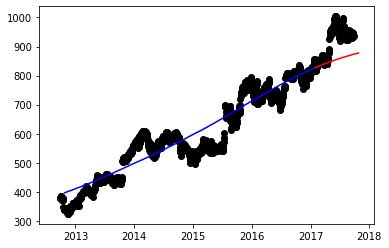

The mean error of the forecast in the test data is 72


In [18]:
model = tf.keras.Sequential([
#tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
tf.keras.layers.Dense(10, activation='sigmoid', input_shape=(1,)),
##tf.keras.layers.Dense(20, activation='sigmoid', input_shape=(1,)),

#tf.keras.layers.Dense(10, activation='relu'),
tf.keras.layers.Dense(10, activation='sigmoid'),
#tf.keras.layers.Dense(20, activation='sigmoid'),

#tf.keras.layers.Dense(10, activation='relu')
tf.keras.layers.Dense(20, activation='relu'),
tf.keras.layers.Dense(1)
])

model.compile(#optimizer=tf.compat.v1.train.AdamOptimizer(0.001),
              optimizer=tf.compat.v1.train.AdamOptimizer(0.01),
              loss="mse",
              metrics=["mae"])  


model.fit(X_scaled,y, epochs=30 , batch_size=10 )
#model.fit(X_scaled,y, epochs=100 , batch_size=10 )
Forecast_train=model.predict(X_scaled)
df_train["Forecast"]= Forecast_train

X_test=np.array(df_test["Time"])
X_test=X_test.reshape(-1,1)

X_testscaled=scaler.transform(X_test)
Forecast_test=model.predict(X_testscaled)
df_test["Forecast"]=Forecast_test

plt.scatter(df["Date"].values,df["Close"], color="black")
plt.plot((df_train["Date"]+pd.DateOffset(days=30)).values,df_train["Forecast"].values, color="blue")
plt.plot((df_test["Date"]+pd.DateOffset(days=30)).values,df_test["Forecast"].values, color="red")

plt.show()

df_validation=df_test.dropna()
print("The mean error of the forecast in the test data is %.f"%
      mean_absolute_error(df_validation["CloseFuture"],
                          df_validation["Forecast"]))

# hyperparameter optimization

Train on 1073 samples
Epoch 1/100
1073/1073 [==============================] - 1s 1ms/sample - loss: 374441.6060 - mae: 596.3303
Epoch 2/100
1073/1073 [==============================] - 0s 310us/sample - loss: 368922.1774 - mae: 591.9306
Epoch 3/100
1073/1073 [==============================] - 0s 315us/sample - loss: 336848.6973 - mae: 565.2128
Epoch 4/100
1073/1073 [==============================] - 0s 317us/sample - loss: 242283.3559 - mae: 477.2180
Epoch 5/100
1073/1073 [==============================] - 0s 337us/sample - loss: 101715.8439 - mae: 301.8445
Epoch 6/100
1073/1073 [==============================] - 0s 329us/sample - loss: 16461.9264 - mae: 108.1990
Epoch 7/100
1073/1073 [==============================] - 0s 355us/sample - loss: 2545.8817 - mae: 41.7791s - loss: 2746.1521 - mae: 43.6
Epoch 8/100
1073/1073 [==============================] - 0s 326us/sample - loss: 2136.9647 - mae: 37.7641
Epoch 9/100
1073/1073 [==============================] - 0s 334us/sample - loss: 212

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


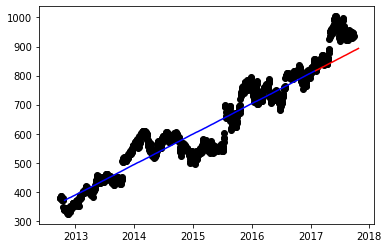

The mean error of the forecast in the test data is 74


In [19]:
model = tf.keras.Sequential([
tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
#tf.keras.layers.Dense(10, activation='sigmoid', input_shape=(1,)),
##tf.keras.layers.Dense(20, activation='sigmoid', input_shape=(1,)),

tf.keras.layers.Dense(10, activation='relu'),
#tf.keras.layers.Dense(10, activation='sigmoid'),
#tf.keras.layers.Dense(20, activation='sigmoid'),

#tf.keras.layers.Dense(10, activation='relu')
tf.keras.layers.Dense(20, activation='relu'),
tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.compat.v1.train.AdamOptimizer(0.001),
              #optimizer=tf.compat.v1.train.AdamOptimizer(0.01),
              loss="mse",
              metrics=["mae"])  


#model.fit(X_scaled,y, epochs=30 , batch_size=10 )
model.fit(X_scaled,y, epochs=100 , batch_size=10 )
Forecast_train=model.predict(X_scaled)
df_train["Forecast"]= Forecast_train

X_test=np.array(df_test["Time"])
X_test=X_test.reshape(-1,1)

X_testscaled=scaler.transform(X_test)
Forecast_test=model.predict(X_testscaled)
df_test["Forecast"]=Forecast_test

plt.scatter(df["Date"].values,df["Close"], color="black")
plt.plot((df_train["Date"]+pd.DateOffset(days=30)).values,df_train["Forecast"].values, color="blue")
plt.plot((df_test["Date"]+pd.DateOffset(days=30)).values,df_test["Forecast"].values, color="red")

plt.show()

df_validation=df_test.dropna()
print("The mean error of the forecast in the test data is %.f"%
      mean_absolute_error(df_validation["CloseFuture"],
                          df_validation["Forecast"]))